##### Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


##### Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

##### Link for the dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality


#### Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

##### Import the dataset

In [2]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
...,...,...,...,...,...,...,...,...
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000
alcohol,6497.0,10.491801,1.192712,8.00000,9.50000,10.30000,11.30000,14.90000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
# fill the missing values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [9]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.216579,1.295751,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339691,0.164548,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318722,0.145231,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.444326,4.757392,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056042,0.035031,0.00900,0.03800,0.04700,0.06500,0.61100
...,...,...,...,...,...,...,...,...
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218395,0.160637,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531215,0.148768,0.22000,0.43000,0.51000,0.60000,2.00000
alcohol,6497.0,10.491801,1.192712,8.00000,9.50000,10.30000,11.30000,14.90000


In [11]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
...,...,...,...,...,...,...,...,...,...,...,...,...
density,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356
sulphates,0.300225,0.225313,0.057564,-0.185716,0.395073,-0.188471,-0.275291,0.259432,0.191075,1.000000,-0.003261,0.038713
alcohol,-0.095560,-0.038215,-0.010431,-0.359656,-0.256844,-0.179838,-0.265740,-0.686745,0.120939,-0.003261,1.000000,0.444319


In [12]:
df.shape

(6497, 13)

<AxesSubplot:>

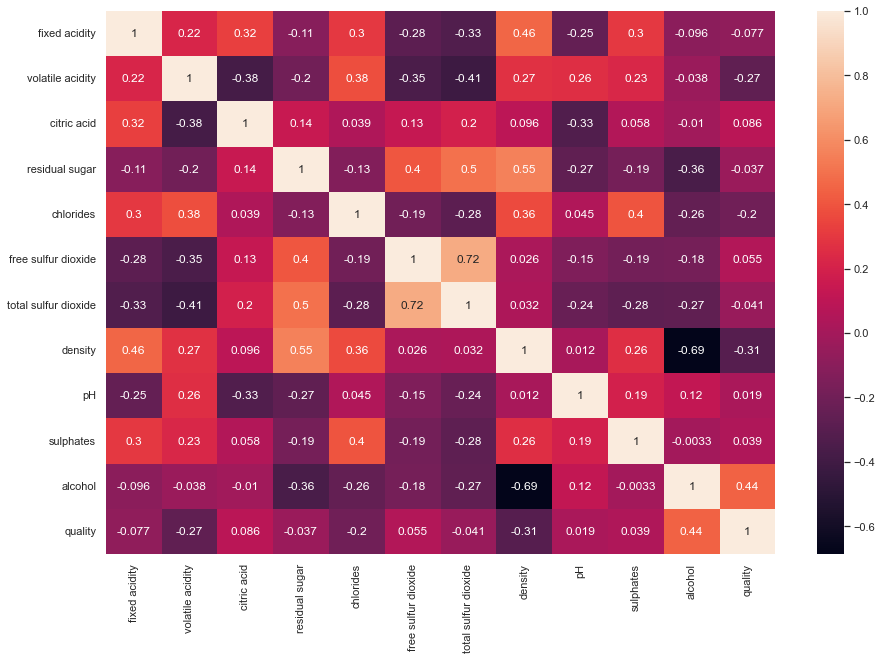

In [13]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

#####  Correlation
IMPORTANT NOTE! There is 'multicollinearity' problem

Here we see that there is relatively high (0.67, positive) correlation between 'free sulfur dioxide' and 'total_sulfur_dioxide' variables. There is relatively high (-0.68, negative) correlation between "pH" and "fixed_acidity" variables. And there is about 0.5 correlation between some of other variables. That's why we must consider when build Machine Learning models.

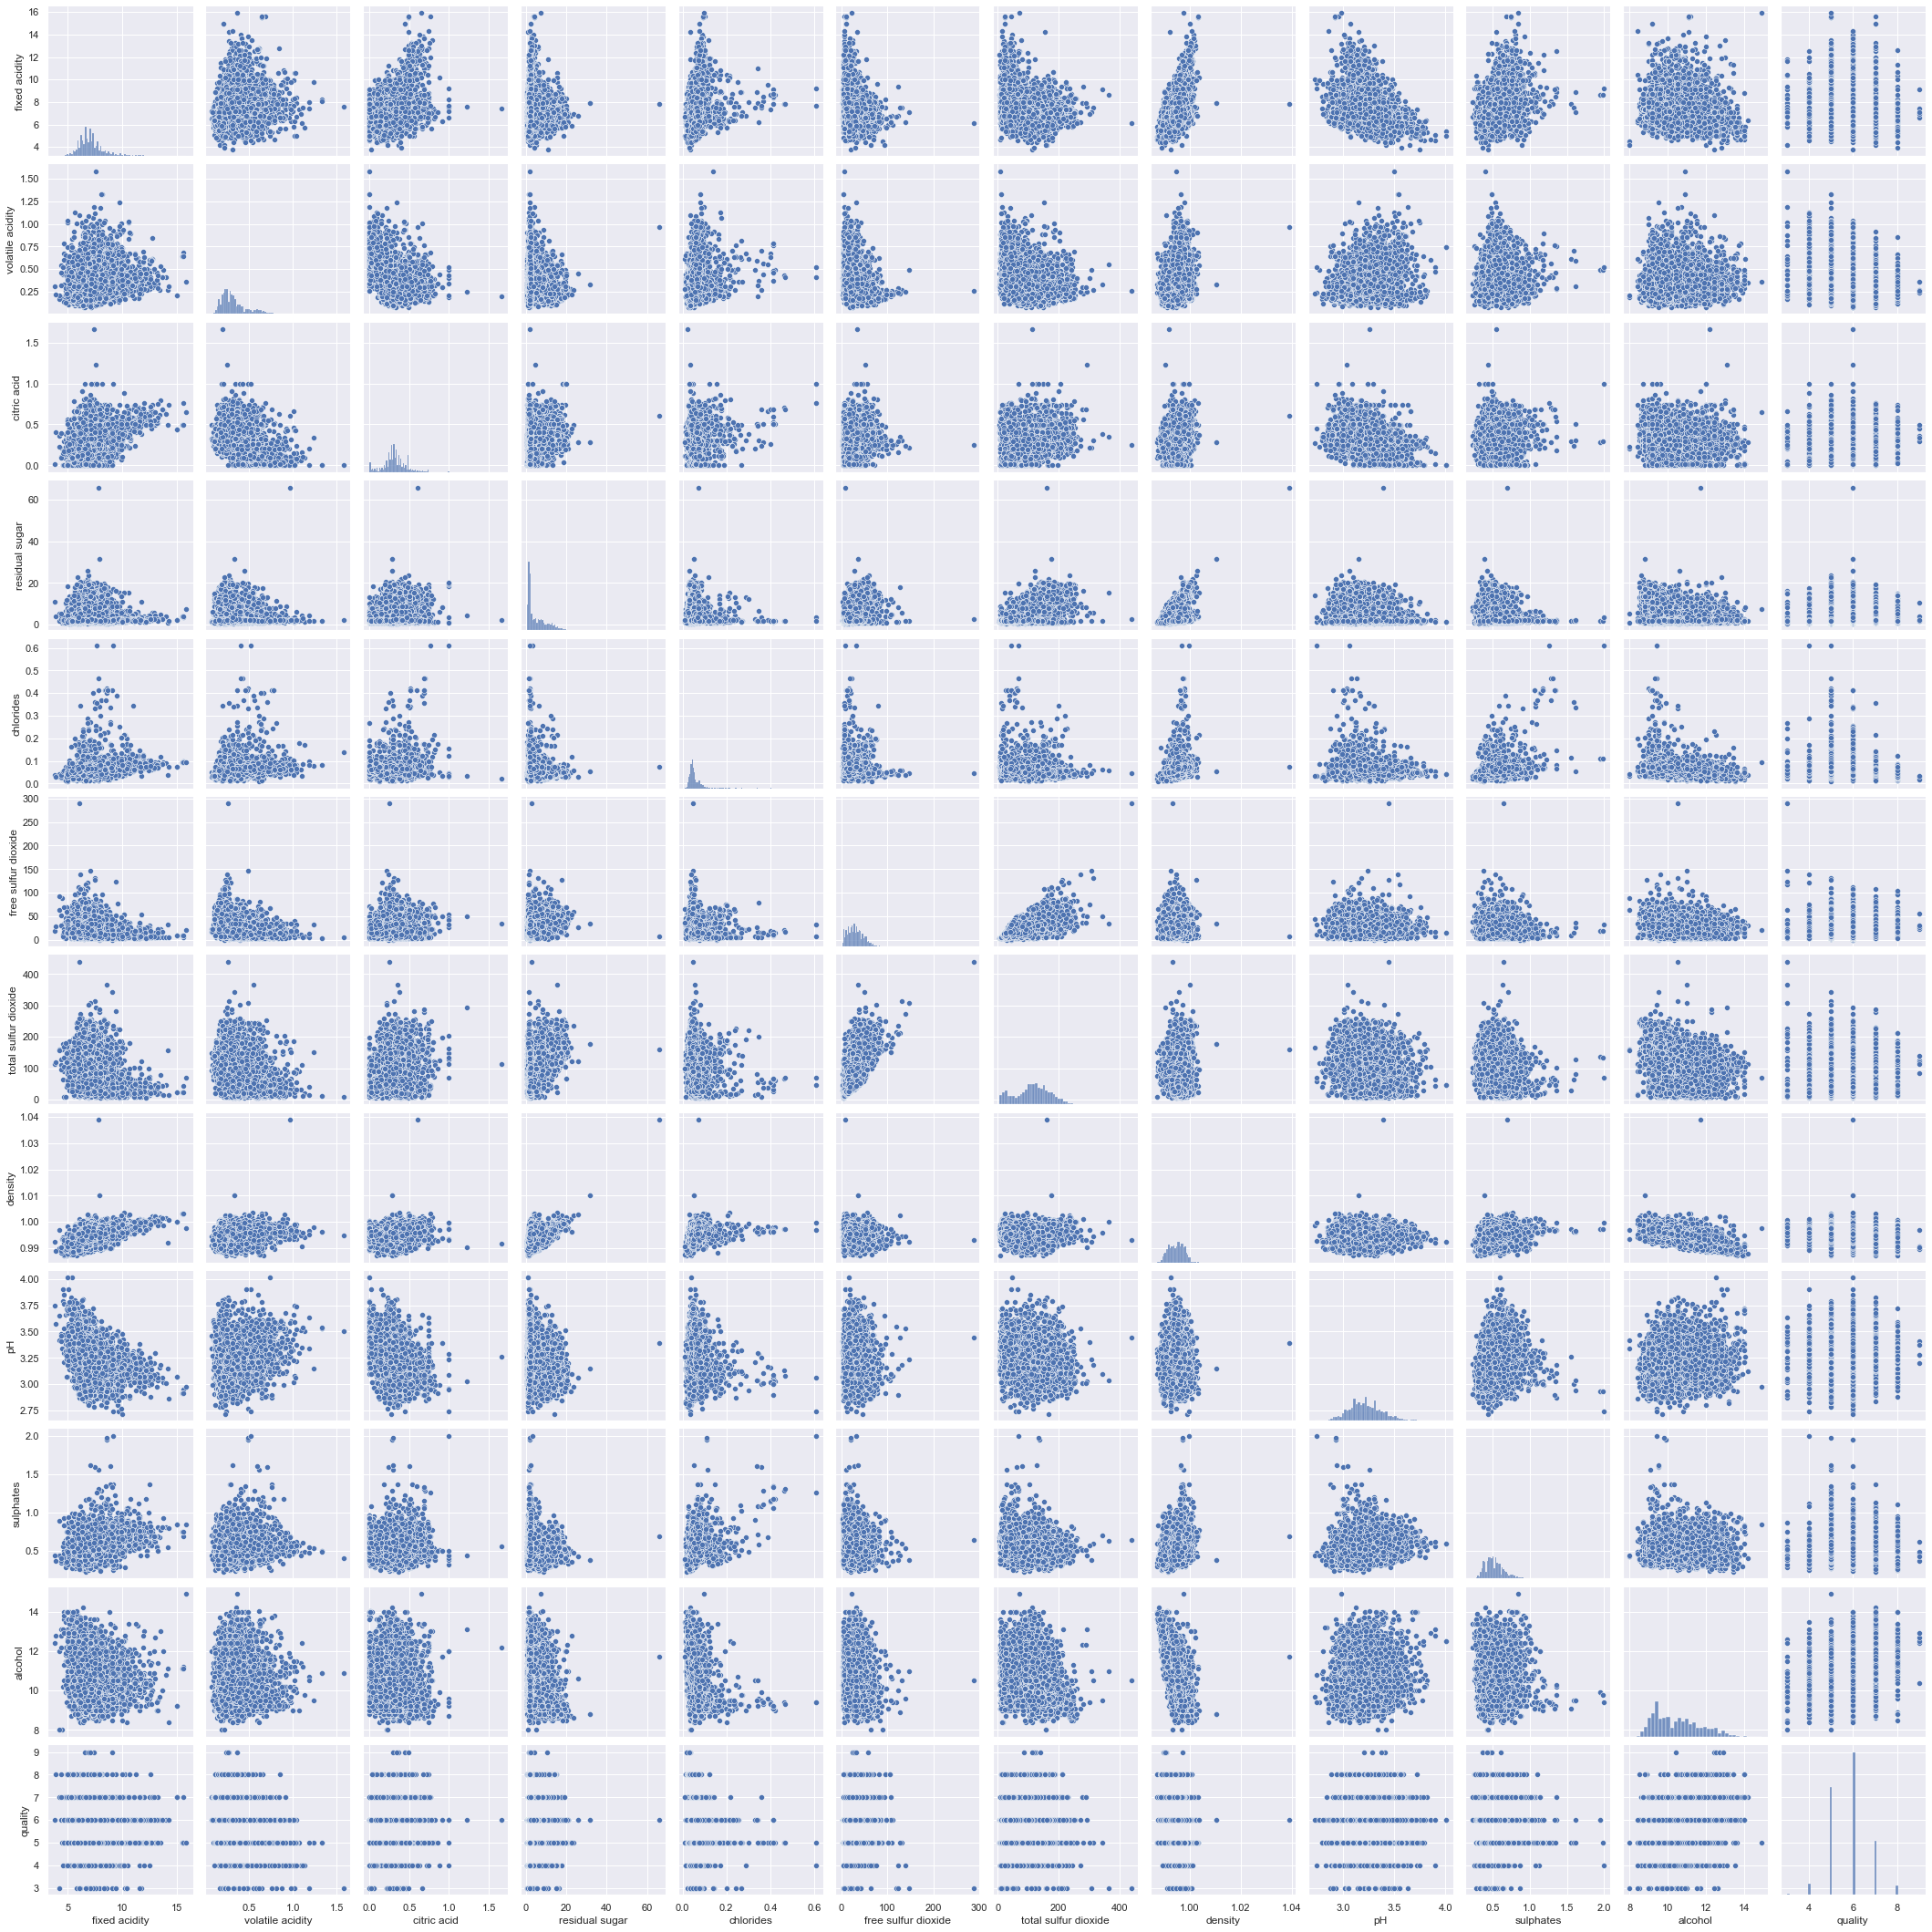

In [14]:
sns.pairplot(df)

<AxesSubplot:xlabel='alcohol'>

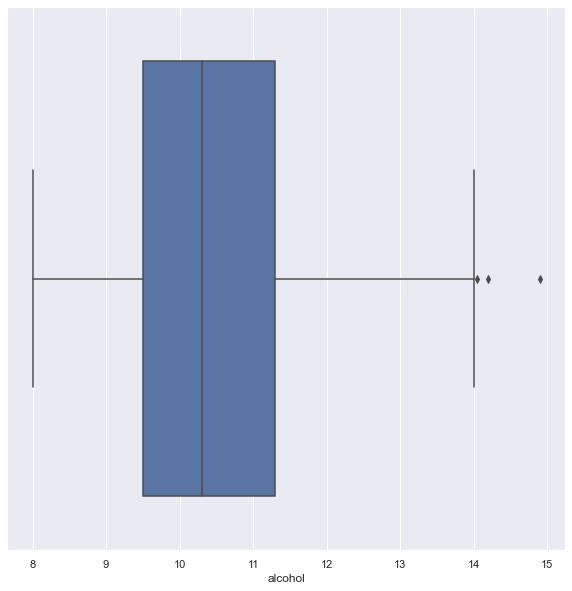

In [15]:
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(df['alcohol'])

<AxesSubplot:xlabel='quality'>

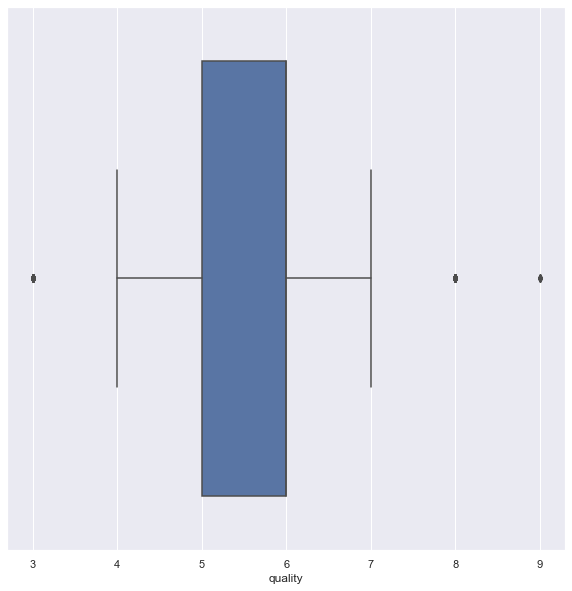

In [16]:
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(df['quality'])

Text(0, 0.5, 'Quality')

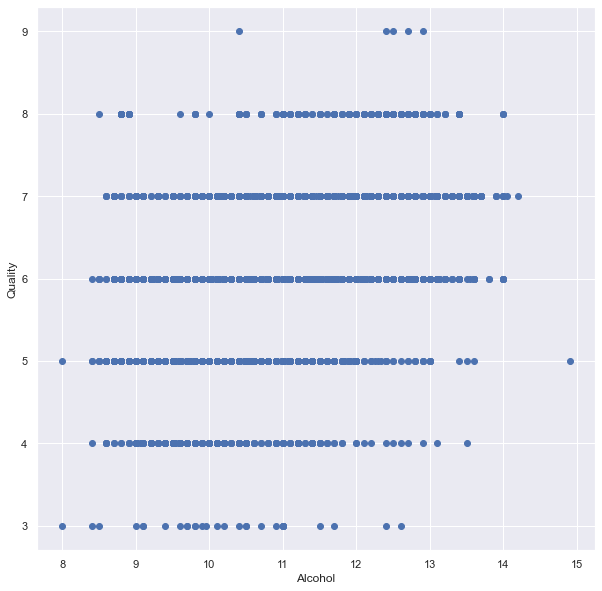

In [17]:
plt.scatter(df['alcohol'],df['quality'])
plt.xlabel("Alcohol")
plt.ylabel("Quality")

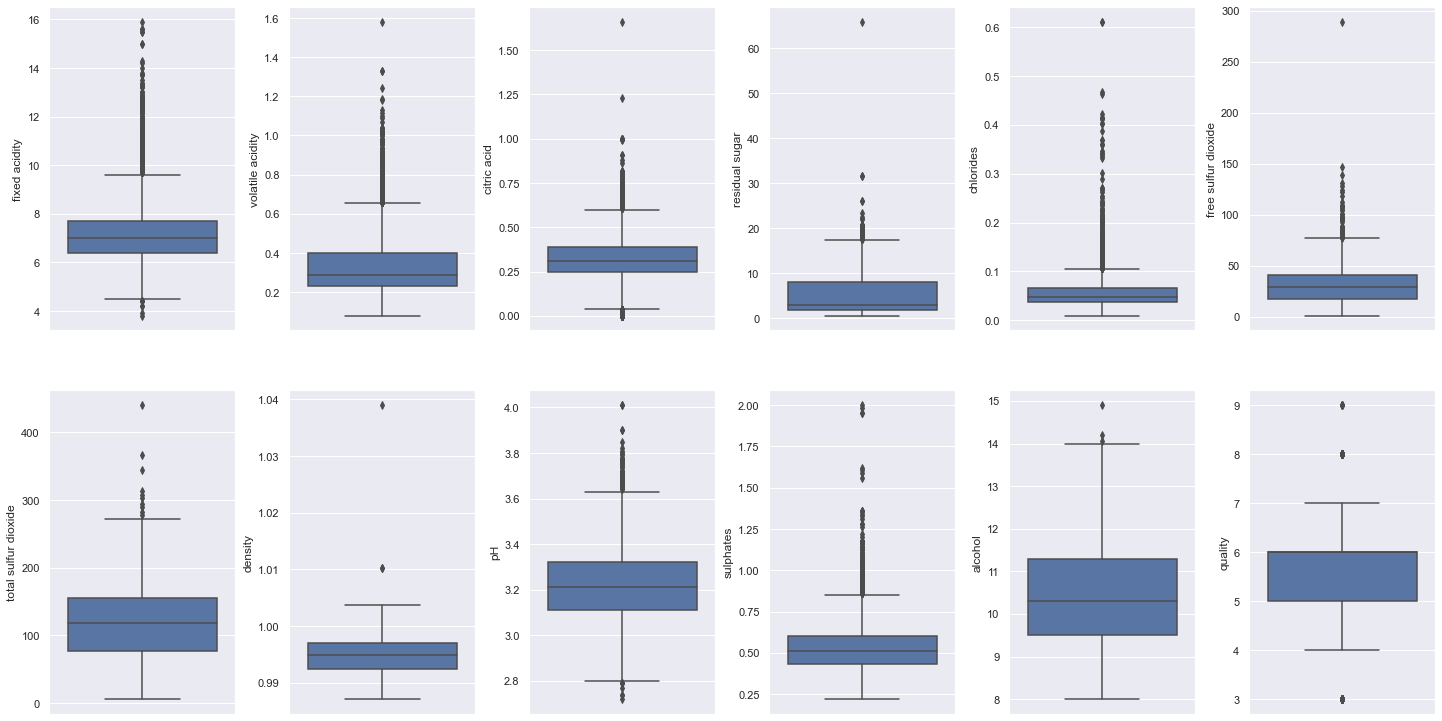

In [18]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

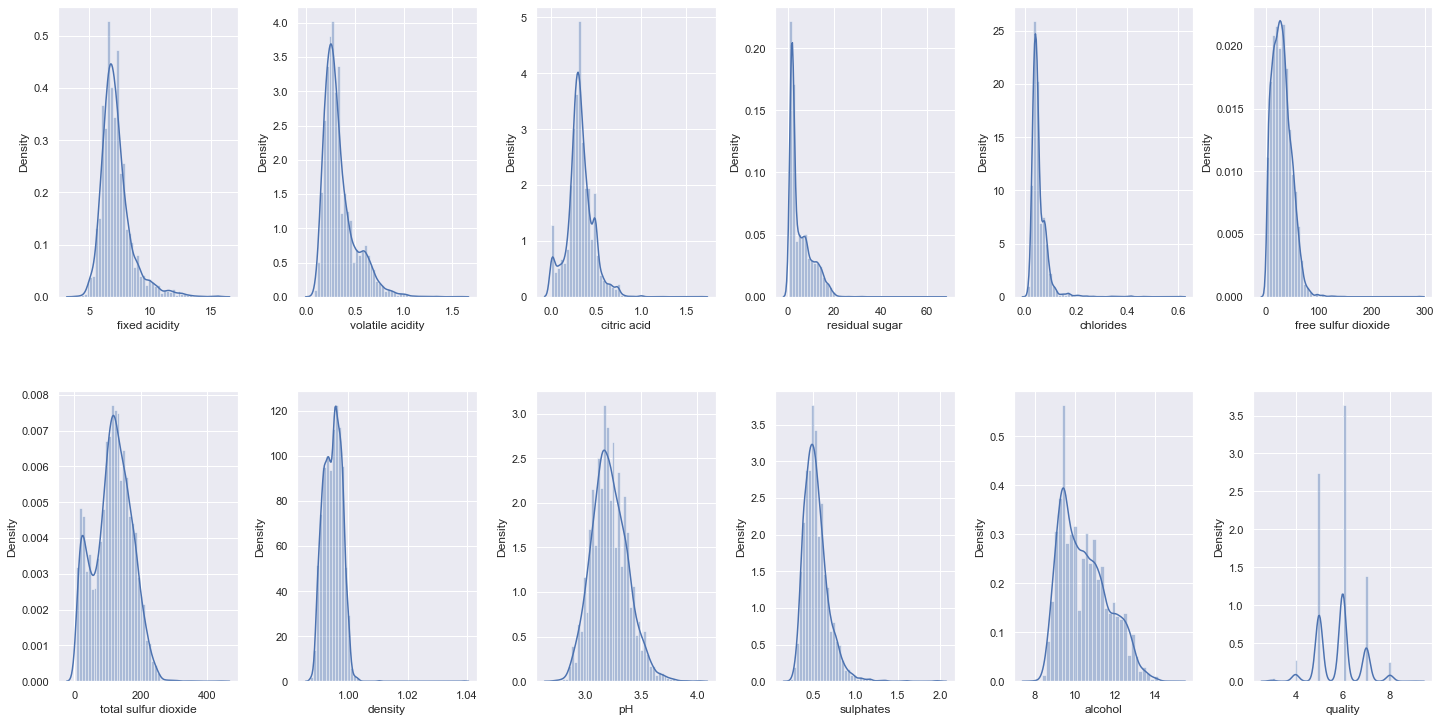

In [19]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [20]:
# log transformation Log transformation helps to make the highly skewed distribution to less skewed.
df['total sulfur dioxide'] = np.log(1 + df['total sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

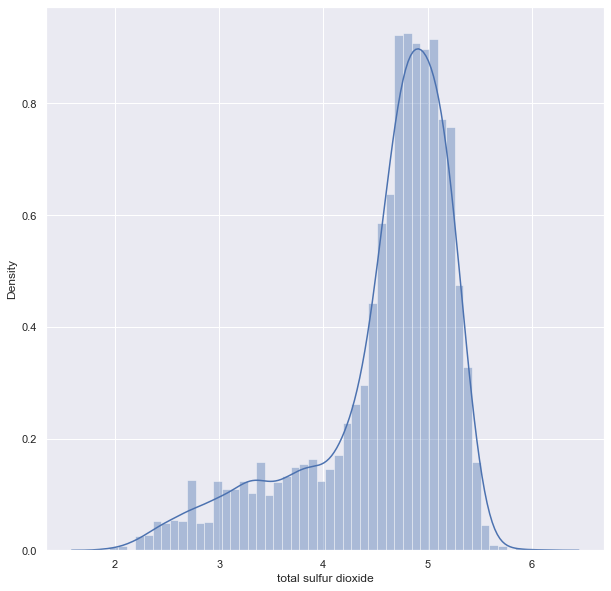

In [21]:
sns.distplot(df['total sulfur dioxide'])

<AxesSubplot:xlabel='type', ylabel='count'>

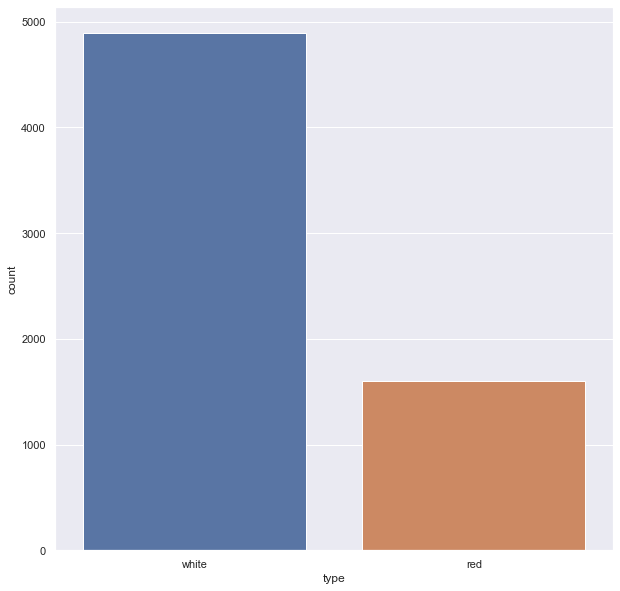

In [22]:
sns.countplot(df['type'])

<AxesSubplot:xlabel='quality', ylabel='count'>

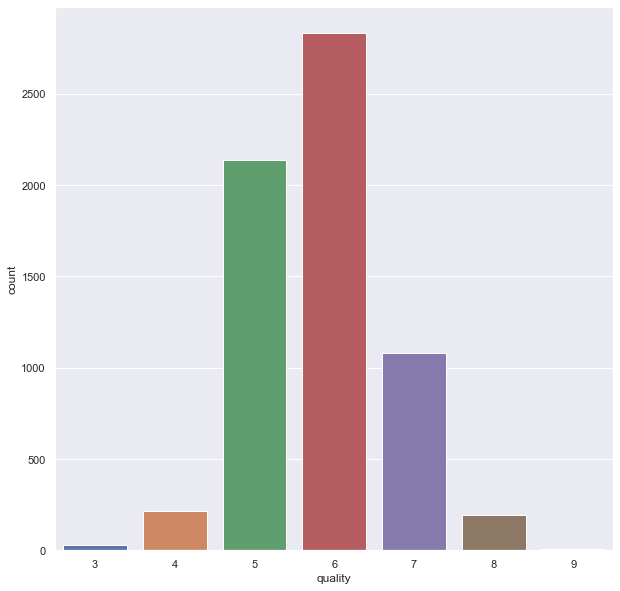

In [23]:
sns.countplot(df['quality'])

##### Making binary classificaion for the response variable.
##### Dividing wine as good and bad by giving the limit for the quality

In [24]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [25]:
X = df.drop(['quality','type'],axis=1)
Y = df['quality']

In [26]:
# Encoding our dependent variable:Quality column
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)
Y

array([0, 0, 0, ..., 0, 0, 0])

#### Splitting the dataset into the Training set and Test set.%20 of dataset for test set,%80 for training set.

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [28]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1539,7.3,0.26,0.49,5.0,0.028,32.0,4.682131,0.99360,3.24,0.54,10.8
1109,9.2,0.22,0.40,2.4,0.054,18.0,5.023881,0.99520,3.04,0.46,9.3
100,7.4,0.25,0.37,13.5,0.060,52.0,5.262690,0.99750,3.00,0.44,9.1
5477,10.6,0.31,0.49,2.2,0.063,18.0,3.713572,0.99760,3.14,0.51,9.8
6416,7.4,0.47,0.46,2.2,0.114,7.0,3.044522,0.99647,3.32,0.63,10.5
...,...,...,...,...,...,...,...,...,...,...,...
3772,6.3,0.24,0.29,13.7,0.035,53.0,4.905275,0.99567,3.17,0.38,10.6
5191,6.9,0.36,0.25,2.4,0.098,5.0,2.833213,0.99640,3.41,0.60,10.1
5226,13.4,0.27,0.62,2.6,0.082,6.0,3.091042,1.00020,3.16,0.67,9.7
5390,8.9,0.40,0.51,2.6,0.052,13.0,3.332205,0.99500,3.32,0.90,13.4


In [29]:
y_train

array([0, 0, 0, ..., 0, 1, 1])

In [30]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3103,7.0,0.25,0.45,2.3,0.045,40.0,4.779123,0.99064,3.16,0.48,11.9
1419,7.6,0.14,0.74,1.6,0.040,27.0,4.644391,0.99160,3.07,0.40,10.8
4761,6.2,0.15,0.27,11.0,0.035,46.0,4.762174,0.99602,3.12,0.38,9.1
4690,6.7,0.16,0.32,12.5,0.035,18.0,5.056246,0.99666,2.88,0.36,9.0
4032,6.8,0.27,0.22,17.8,0.034,16.0,4.762174,0.99890,3.07,0.53,9.2
...,...,...,...,...,...,...,...,...,...,...,...
4509,6.7,0.23,0.17,1.3,0.061,14.0,4.615121,0.99250,3.07,0.55,9.5
3350,7.2,0.22,0.28,7.2,0.060,41.0,4.890349,0.99350,3.08,0.59,11.3
1730,9.2,0.23,0.30,1.1,0.031,40.0,4.605170,0.99290,2.94,0.30,10.4
2225,7.6,0.23,0.26,15.3,0.067,32.0,5.117994,0.99860,3.03,0.44,9.2


In [31]:
y_test

array([1, 1, 0, ..., 0, 0, 0])

#### Scaling the data using StandardScaler to bring the data points closer to the best fit line

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)

In [34]:
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
X_train_scaled

array([[ 0.05774648, -0.48603987,  1.17497687, ...,  0.13174139,
         0.04025317,  0.25267266],
       [ 1.50939876, -0.72679705,  0.55539336, ..., -1.11293313,
        -0.48733115, -1.00093862],
       [ 0.13414923, -0.54622916,  0.34886553, ..., -1.36186804,
        -0.61922723, -1.16808679],
       ...,
       [ 4.71831433, -0.42585057,  2.06993083, ..., -0.36612842,
         0.8975777 , -0.66664228],
       [ 1.28019051,  0.35661028,  1.31266209, ...,  0.6296112 ,
         2.41438262,  2.42559889],
       [ 0.6689685 , -0.42585057,  0.2111803 , ...,  0.00727394,
         0.63378553, -0.08162368]])

In [36]:
X_test_scaled

array([[-0.15385272, -0.54212657,  0.91725851, ..., -0.35583504,
        -0.30958735,  1.20767302],
       [ 0.32425573, -1.23145329,  2.91603552, ..., -0.91680168,
        -0.88320424,  0.27594721],
       [-0.79133065, -1.16878722, -0.32336171, ..., -0.60515355,
        -1.02660846, -1.16399267],
       ...,
       [ 1.5992116 , -0.6674587 , -0.11659167, ..., -1.72708682,
        -1.60022535, -0.06286217],
       [ 0.32425573, -0.6674587 , -0.39228505, ..., -1.16612019,
        -0.59639579, -1.07929033],
       [ 0.6429947 ,  1.52585358, -0.25443836, ...,  0.01814272,
         0.12062532, -0.90988563]])

In [37]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC,SVC
from sklearn.pipeline import make_pipeline
clf = SVC()

In [38]:
clf = clf.fit(X_train,y_train)

In [39]:
y_pred = clf.predict(X_test)

In [40]:
# #Finding best parameters for our SVC model
# param = {
#     'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
#     'kernel':['linear', 'rbf'],
#     'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
# }
# grid_svc = GridSearchCV(clf, param_grid=param, scoring='accuracy', cv=10)

In [41]:
# grid_svc.fit(X_train, y_train)

In [42]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f%%" % (accuracy_score(y_pred,y_test) * 100.0))

Accuracy: 81.05%


#### Classification Report for the unscaled Data

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1317
           1       0.00      0.00      0.00       308

    accuracy                           0.81      1625
   macro avg       0.41      0.50      0.45      1625
weighted avg       0.66      0.81      0.73      1625



In [43]:
clf_scaled = clf.fit(X_train_scaled,y_train)

In [44]:
y_pred_scaled = clf_scaled.predict(X_test_scaled)

In [45]:
print("Accuracy: %.2f%%" % (accuracy_score(y_pred_scaled,y_test) * 100.0))

Accuracy: 83.45%


#### Classification Report for the Scaled Data

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1317
           1       0.65      0.28      0.39       308

    accuracy                           0.83      1625
   macro avg       0.75      0.62      0.65      1625
weighted avg       0.81      0.83      0.81      1625



In [47]:
#k-Fold cross validation for improving our model
from sklearn.model_selection import cross_val_score
accuracy_cv = cross_val_score(estimator = clf, X = X_train,y = y_train, cv = 20)
#we can see model's average accuracy
accuracy_cv.mean()

0.8011106051406596

In [48]:
#k-Fold cross validation for improving our model
from sklearn.model_selection import cross_val_score
accuracy_cv = cross_val_score(estimator = clf, X = X_train_scaled,y = y_train, cv = 20)
#we can see model's average accuracy
accuracy_cv.mean()

0.8327152060986306

#### Improving the Accuracy using best params

In [52]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1317
           1       0.71      0.35      0.47       308

    accuracy                           0.85      1625
   macro avg       0.79      0.66      0.69      1625
weighted avg       0.84      0.85      0.83      1625



In [56]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train_scaled, y_train)
pred_svc2_scaled = svc2.predict(X_test_scaled)
print(classification_report(y_test, pred_svc2_scaled))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1317
           1       0.71      0.42      0.53       308

    accuracy                           0.86      1625
   macro avg       0.80      0.69      0.72      1625
weighted avg       0.85      0.86      0.84      1625

